In [32]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [1]:
import numpy as np
import scipy
import astropy
from astropy.io import fits
import glob

In [136]:
files = []

for file in glob.glob('/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-*.fits'):
    print(file)
    files.append(fits.open(file))

/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M13072813+1653414.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M08463782+5729103.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16462176-0207594.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16471235-0153543.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16465982-0202241.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16470753-0157022.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16470791-0135506.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16470110-0239298.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16452941-0242588.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M05580827+1345138.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/apStar-r8-2M16471184-0159574.fits
/users/mirandaviederman/Downloads/FITS Files/N_data/ap

In [173]:
total_matrix = files[0][1].data

for k in range(1,len(files)):
    total_matrix = np.vstack((total_matrix,files[k][1].data))

In [174]:
total_matrix.shape

(67, 8575)

In [147]:
%%time
u,s,v = np.linalg.svd(total_matrix)

<IPython.core.display.Javascript object>


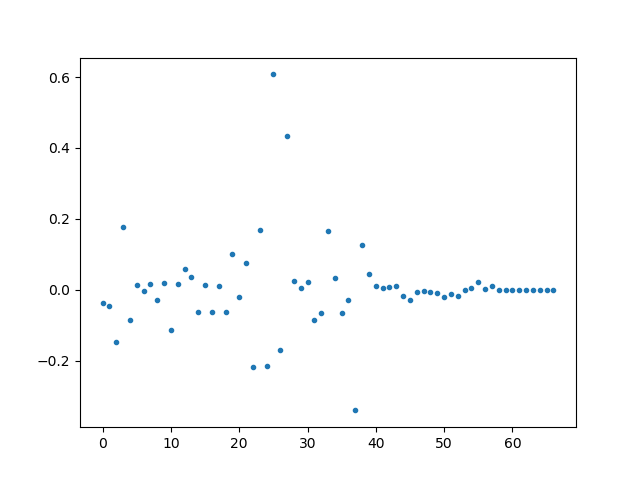

In [175]:
fig, ax = plt.subplots()
ax.plot(u[0],marker='.',ls='')

In [20]:
files=[
    file1, file2, file3, file4, file5, file6, file7, file8, file9, file10
]

In [45]:
for file in files:
    crval1 = file[1].header['CRVAL1']
    cdelt1 = file[1].header['CDELT1']
    data = print(crval1*cdelt1)

2.5074e-05
2.5074e-05
2.5074e-05
2.5074e-05
2.5074e-05
2.5074e-05
2.5074e-05
2.5074e-05
2.5074e-05
2.5074e-05


In [40]:
type(file[1].header['CDELT1'])

float